In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
src_path = Path("../src").resolve()
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

from baseline import Baseline
from config import ForecastConfig

In [5]:
def evaluate_models(model: 'Baseline') -> None:
    """Evaluate different forecasting models and print results."""
    models_to_test = {
        'Naive': {'method': 'naive', 'kwargs': {'noise_scale': 1}},
        'Drift': {'method': 'drift', 'kwargs': {}},
        'Random': {'method': 'random', 'kwargs': {'scale': 0.1, 'random_state': 42}},
        'Mean': {'method': 'mean', 'kwargs': {}}
    }
    
    print("\nModel Evaluation Results:")
    print("-" * 30)
    for name, config in models_to_test.items():
        getattr(model, config['method'])(**config['kwargs'])
        print(f'{name:>6} PCC = {model.pearson_corr():.3f}')

In [3]:
cfg = ForecastConfig(plot_start=None)
train, test = cfg.load_data(
    train_cols=['label'],
    use_actual_test=False,
    test_size=0.5
)

model = Baseline(train, test, window=250000)
        
evaluate_models(model)


Model Evaluation Results:
------------------------------
 Naive PCC = 0.002
 Drift PCC = 0.024
Random PCC = 0.015
  Mean PCC = 0.000


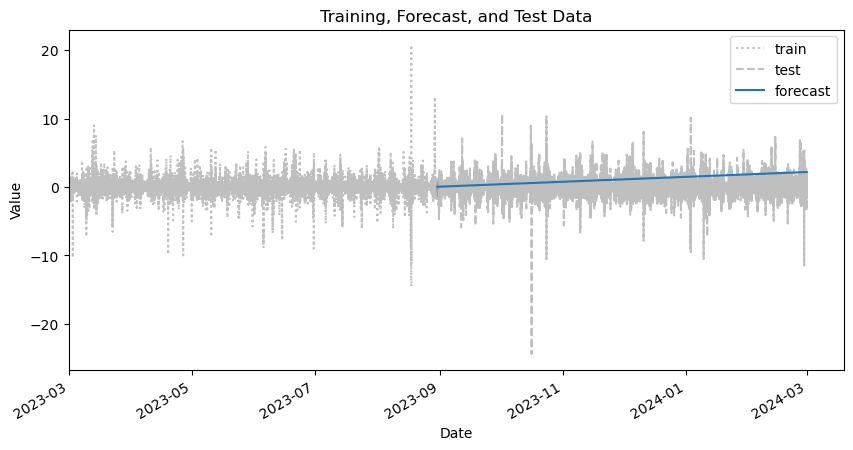

In [16]:
model.drift()
model.plot_forecast(start_date_str=train.index[0])